In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Random Variables and distributions
Let's start with drawing a sample of 30 variables from a uniform distribution from 0 to 9. We will also compute mean and variance.

Sample: [9 0 8 9 1 7 6 0 0 4 1 2 7 3 7 8 1 9 4 5 0 4 7 1 3 9 5 5 2 0]
Mean = 4.233333333333333
Variance = 9.978888888888887


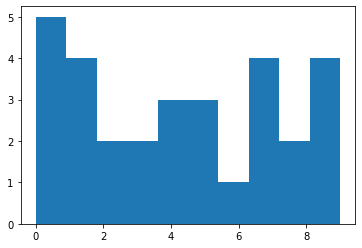

In [2]:
sample = np.random.randint(0,10,30)
serie=pd.Series(sample)
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}") #varianza elevada significa que los datos están más dispersos
plt.hist(sample)
plt.show()

# Analizando data real

In [3]:
df=pd.read_csv("MLBPlayers.csv")
print(df.head())
df.info()

              Name Team       Position  Height(inches)  Weight(pounds)    Age
0    Adam_Donachie  BAL        Catcher              74           180.0  22.99
1        Paul_Bako  BAL        Catcher              74           215.0  34.69
2  Ramon_Hernandez  BAL        Catcher              72           210.0  30.78
3     Kevin_Millar  BAL  First_Baseman              72           210.0  35.43
4      Chris_Gomez  BAL  First_Baseman              73           188.0  35.71
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1034 non-null   object 
 1   Team            1034 non-null   object 
 2   Position        1034 non-null   object 
 3   Height(inches)  1034 non-null   int64  
 4   Weight(pounds)  1033 non-null   float64
 5   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


In [6]:
print(f"Mean of the Age: {df['Age'].mean()}")
print(f"Mean of the Height: {df['Height(inches)'].mean()}")
print(f"Mean of the Weight: {df['Weight(pounds)'].mean()}")


Mean of the Age: 28.736711798839462
Mean of the Height: 73.6972920696325
Mean of the Weight: 201.6892545982575
max value:290.0
min value:150.0


In [7]:
mean = df['Height(inches)'].mean()
var = df['Height(inches)'].var()
std = df['Height(inches)'].std()
print(f"max value:{df['Height(inches)'].max()}")
print(f"min value:{df['Height(inches)'].min()}")
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

max value:83
min value:67
Mean = 73.6972920696325
Variance = 5.316798081118074
Standard Deviation = 2.3058183105175645


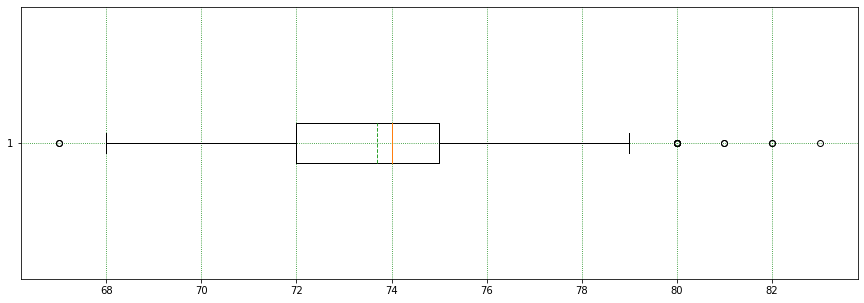

In [11]:
plt.figure(figsize=(15,5))
plt.boxplot(df['Height(inches)'],vert=False,showmeans=True,meanline=True)
plt.grid(color='green',linestyle='dotted')
plt.show()

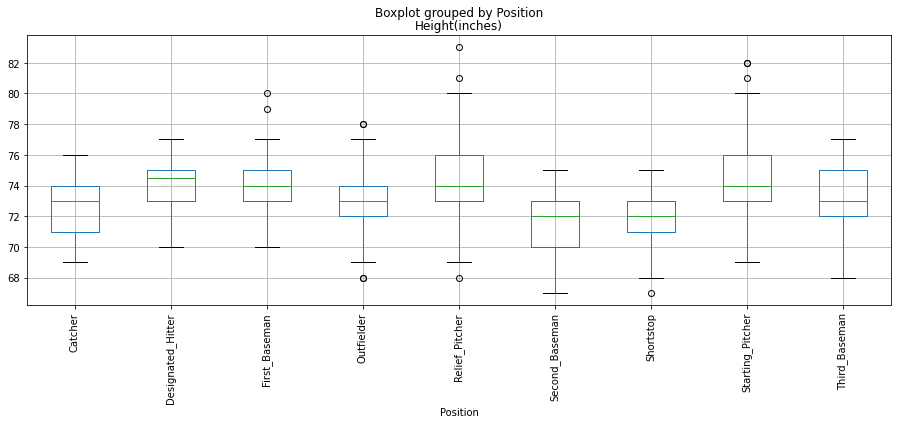

In [13]:
df.boxplot(column='Height(inches)',by='Position',figsize=(15,5))
plt.xticks(rotation='vertical')
plt.show()

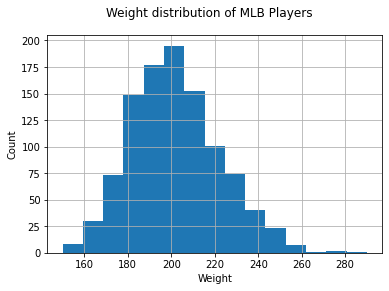

In [20]:
df['Weight(pounds)'].hist(bins=15)#bins es el intervalo de los datos
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

# Distribución Normal


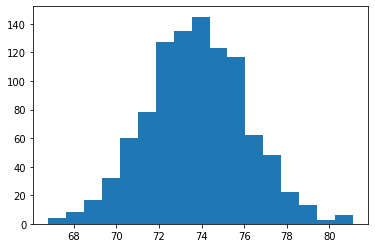

In [27]:
generated = np.random.normal(mean,std,1000)
plt.hist(generated,bins=17)
plt.show()

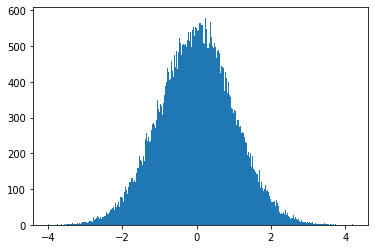

In [28]:
plt.hist(np.random.normal(0,1,50000),bins=300)
plt.show()

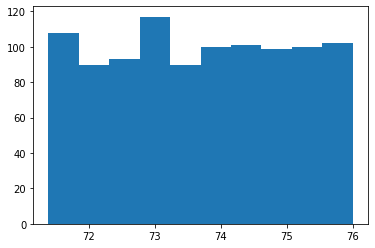

In [29]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.hist(wrong_sample)
plt.show()

# Confidence Intervals

In [33]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a),scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h
for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight(pounds)'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f}±{h:.2f}")

p=0.85, mean = 201.73±0.94
p=0.90, mean = 201.73±1.08
p=0.95, mean = 201.73±1.28


# Hipothesys Testing

In [37]:
df.groupby('Position').agg({ 'Height(inches)' : 'mean', 'Weight(pounds)' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height(inches),Weight(pounds),Count
Position,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


In [39]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Position']=='First_Baseman',['Height(inches)']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Position']=='Second_Baseman',['Height(inches)']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 73.62..74.38, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 73.56..74.44, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 73.47..74.53, 2nd basemen height: 70.92..71.81


# Student t-test

p-value can be considered as the probability of two distributions having the same mean. In our case, it is very low, meaning that there is strong evidence supporting that first basemen are taller

t-value is the intermediate value of normalized mean difference that is used in t-test, and it is compared against threshold value for a given confidence value

In [40]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Position']=='First_Baseman',['Height(inches)']], df.loc[df['Position']=='Second_Baseman',['Height(inches)']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738925e-12


# Correlations and evil baseball corp
Correlation allows us to find inner connection between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays it's players according to their height - the taller the player is, the more money he/she gets. Suppose there is a base salary of 0 to $100, depending on height. We will take the real players from MLB, and compute their imaginary salaries:


In [44]:
heights = df['Height(inches)']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights,salaries))[:20])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181), (73, 1064.4973489967772), (73, 1064.4973489967772), (74, 1075.2469071629068), (74, 1075.2469071629068), (69, 1021.4991163322591), (70, 1032.2486744983887), (72, 1053.7477908306478), (73, 1064.4973489967772), (75, 1085.9964653290363), (78, 1118.245139827425)]


Let's now compute covariance and correlation of those sequences. np.cov will give us so-called covariance matrix, which is an extension of covariance to multiple variables. The element  of the covariance matrix  is a correlation between input variables  and , and diagonal values  is the variance of . Similarly, np.corrcoef will give us correlation matrix.

In [45]:
print(f"Covariance matrix:\n{np.cov(heights,salaries)}")
print(f"Covariance = {np.cov(heights,salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.153230230544644
Correlation = 1.0


Correlation equal to 1 means that there is a strong linear relation between two variables. We can visually see the linear relation by plotting one value against the other:

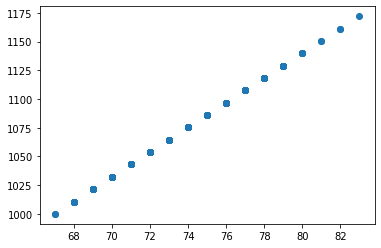

In [48]:
plt.scatter(heights,salaries)
plt.show()

Correlation = 0.9835304456670814
Correlation = 0.9363227803276455


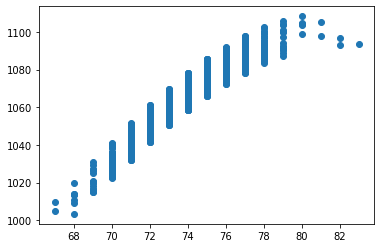

In [51]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights,salaries)[0,1]}")
plt.scatter(heights,salaries)
plt.show()

esto fue con datos artificialmente creados para ver la correlacion de datos hechos totalmente relacionados, veamos ahora con datos reales

In [57]:
np.corrcoef(df['Height(inches)'],df['Weight(pounds)'].fillna(method='pad'))


array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

no tiene muy buena correlacion, pero igual podemos graficar

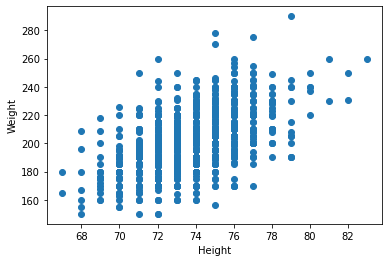

In [59]:
plt.scatter(df['Height(inches)'],df['Weight(pounds)'].fillna(method='pad'))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()